In [113]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stat
import cv2
from os import listdir
import numpy.linalg as LA
from itertools import combinations


## Step 1: Image loading and preprocessing
I am using images from 8 indiviidual of PubFig88 dataset. After loading images, I converted them to gray scale for easy calculation. All images are of size 100x100 and were all registered. 

Text(0.5, 1.0, 'Training image example')

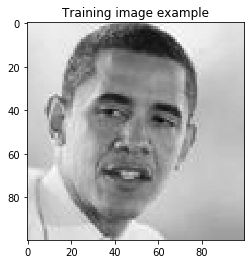

In [46]:
dataset=[]
path= r"C:\Users\Felix\Documents\Spring 2021\Pattern recognition\Assignments\Face detection\dataset\train"
file_names=listdir(path)
for file in file_names:
    img= cv2.imread(path+"\\"+file)
    img= gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dataset.append(img)
plt.imshow(dataset[0],cmap='gray')
plt.title("Training image example")

## Step 2: Flattenning the images and computing an average image

Text(0.5, 1.0, 'Average image')

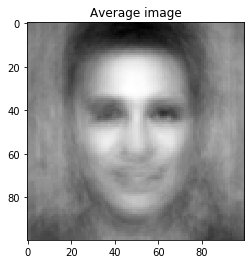

In [45]:
M=len(dataset) # Number of images in a dataset
N= dataset[0].shape[0] # Size of images
img_vector=[i.flatten() for i in dataset] ## reshape image from NXN to 1XN^2
avg_img=np.mean(img_vector,axis=0)
## Display average image
plt.imshow(np.reshape(avg_img, (N,N)), cmap="gray")
plt.title("Average image")

## Step 3 Covariance matrix
He we first substract each training image from the mean,form a matrix A of the resulting matrix and then compute covariace matrix


In [126]:
A=[img-avg_img for img in img_vector]
cov= (1/M)*np.dot(A,np.transpose(A))
eigen_val,eigen_vec= LA.eig(cov)

### Projection of covariance matrix
U=np.dot(np.transpose(A),eigen_vec)
## Projection of each image 
omega=[np.dot(np.transpose(U),a) for a in A]
threshold=(1/2)*max([np.linalg.norm((np.add(img1,-1*img2))) for img1, img2 in combinations(omega, 2)])


## Step 4 Image recognition

In [121]:
theta

[array([2.43005408e+08, 5.81357912e+06, 3.99134079e+07, 1.43240809e+07,
        4.64069531e+06, 2.06711133e+07, 4.32055838e+06, 5.01226652e+06,
        5.59366690e+06, 4.03104430e+06, 1.36660478e+07, 4.76873869e+06,
        2.87183660e+06, 6.04409388e+06, 1.74511612e+05, 7.72006743e+06,
        1.07284513e+07, 4.62302740e+06, 1.79872112e+06, 3.79234078e+06,
        1.88474438e+06, 4.28836055e+05, 6.08524913e+06, 2.42492304e+06,
        8.88968683e+05, 4.16331232e+06, 1.08917118e+06, 4.13391315e-08,
        4.85198734e+06, 7.12255489e+05, 1.37600807e+06, 1.52332607e+06,
        2.72706332e+06, 1.53682011e+06, 1.95048690e+05, 1.16464404e+06,
        4.05194058e+06, 4.44319435e+05, 5.19613740e+05, 1.02678301e+04,
        1.54160293e+05, 3.99407350e+04, 2.88999530e+05, 2.46311334e+06,
        1.01821165e+06, 3.37047114e+06, 7.24655133e+05, 1.04244406e+06,
        2.10511271e+05, 3.04420276e+06, 2.61361921e+06, 1.15357741e+06,
        1.35032877e+06, 1.67137291e+06, 3.72431320e+05, 3.060571